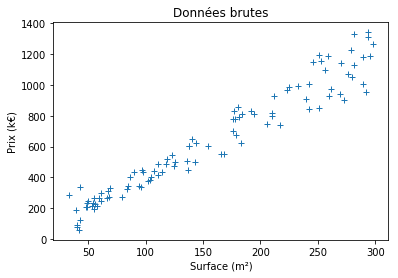

In [2]:
# Generate raw data ;)
import random
import matplotlib.pyplot as plt

def affine(x, a = 4, b = 10):
    return (a * x) + b


def noise(x):
    signe = random.random()
    if signe < 0.5:
        signe = -1
    else:
        signe = 1
        
    proportion = 5
    if x < 200:
        proportion = 1
    
    return x + ((x / proportion) * signe * random.random())


def random_x(start, stop, nb_point):

    x_points = []
    for i in range(0, nb_point):
        x_points.append(int((random.random() * (stop - start) + start)))

    return sorted(x_points)



x_values = random_x(30, 300, 100)
y_values = list(map(lambda x: noise(affine(x)), x_values))

plt.ylabel('Prix (k€)')
plt.xlabel('Surface (m²)')
plt.title('Données brutes')
plt.plot(x_values, y_values, '+')
plt.show()




In [3]:
# RAW data
import pandas as pd

x_values_pd = pd.DataFrame({'surface (m²)': x_values})
x_values_pd.head()

,surface (m²)
0,33
1,39
2,40
3,40
4,42


In [4]:
y_values_pd = pd.DataFrame({'prix (k€)': y_values})
y_values_pd.head()

,prix (k€)
0,283.246264
1,186.753035
2,92.307643
3,78.350345
4,59.054104


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import itertools
from sklearn.metrics import mean_squared_error

In [6]:
mse = []
coefs = []
intercepts = []
# # Split dataset into learning/test sets
# for random_split in [4]:

X_train, X_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.33, random_state=42)
X_train = list(map(lambda x: [x], X_train))
X_test = list(map(lambda x: [x], X_test))


# Train model
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
coefs.append(reg.coef_)
intercepts.append(reg.intercept_)
mse.append(mean_squared_error(y_test, y_pred))

In [7]:
# a and b for abline function
print(np.mean(coefs))
print(np.mean(intercepts))

# generate a straight line according to 
x_values_model = random_x(30, 300, 100)
y_values_model = list(map(lambda x: affine(x,np.mean(coefs),np.mean(intercepts) ), x_values_model))

3.99407895615
12.0626607268


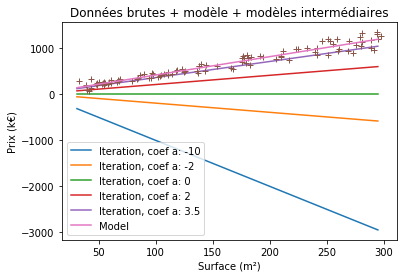

In [9]:
# generate 'false' intermediate coef and intercept values
a = [-10,-2,0,2,3.5]
b = [-10,0,0,5,6]
computed_mse = []

affine_y_values = list(map(lambda x: affine(x,4,10), x_values_model))

for i in range(0,len(a)):
    tmp_y_values = list(map(lambda x: affine(x,a[i],b[i]), x_values_model))
    plt.plot(x_values_model, tmp_y_values, label="Iteration, coef a: {}".format(a[i]))
    computed_mse.append(mean_squared_error(affine_y_values, tmp_y_values))
    
# plot raw data + model
plt.ylabel('Prix (k€)')
plt.xlabel('Surface (m²)')
plt.title('Données brutes + modèle + modèles intermédiaires')
plt.plot(x_values, y_values, '+')
plt.plot(x_values_model, y_values_model, label="Model")
plt.legend(loc='best')
plt.show()

Text(0.5,0,'iteration')

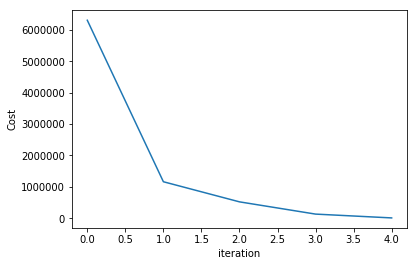

In [10]:
# Evolution de la metrique
plt.plot(computed_mse)
plt.ylabel('Cost')
plt.xlabel('iteration')